In [1]:
import pandas as pd

C:\Users\sh_su\AppData\Local\Temp\ipykernel_24392\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_pdbbind = pd.read_csv('predicted_set.csv')
df_skempi = pd.read_csv('predicted_skempi.csv')

In [9]:
columns_to_drop = ['target_encoding_1', 'target_encoding_2', 'combined', 'out']

df_pdb_sorted = df_pdb_sorted.drop(columns=columns_to_drop)

In [5]:
df_pdb_sorted = df_pdbbind.sort_values(by='predicted_value', ascending=True)

In [12]:
df_pdb_s2 = df_pdb_sorted[df_pdb_sorted['predicted_value'] == -8.08991]

In [55]:
df_pdb_s2.to_csv('pdb_sorted.csv', index=False)

In [18]:
df_skmp_sorted = df_skempi.sort_values(by='Predicted', ascending=False)

In [26]:
df_skmp_sorted.reset_index(inplace=True)

In [13]:
import matplotlib.pyplot as plt

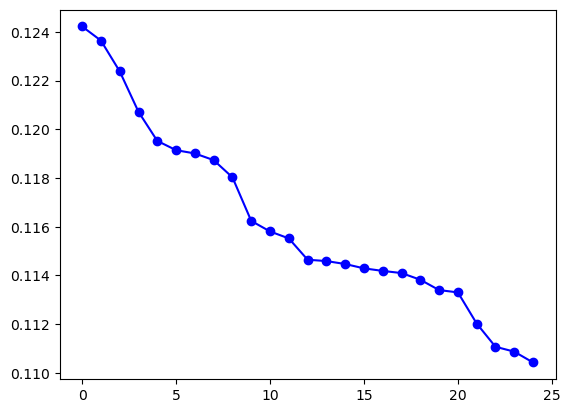

In [30]:
plt.plot(df_skmp_sorted.head(25).index, df_skmp_sorted['Predicted'].head(25), marker='o', linestyle='-', color='b', label='Sales')

plt.show()

In [33]:
df_skmp_s2 = df_skmp_sorted.head(21)

In [54]:
df_skmp_s2.to_csv('skempi_sorted.cav', index=False)

In [35]:
df_skmp_sorted['Predicted'][21]

0.1120244413614273

In [48]:
match = df_skmp_sorted['Mutant']

In [53]:
count = 0
for i in df_pdb_s2['Target Sequence 2']:
    if i in match:
        count += 1
        print(i)
print(count)

0


In [56]:
df_skmp_s2['Mutant']

0     LFDTGSSYYYWTIDTGTNFFI
1     LFDTGSSNYYWTIDTGTNFFI
2     LFDTGSSVYYWTIDTGTNFFI
3     LFDTGSSCYYWTIDTGTNFFI
4     LFDTGSSKNYWTIDTGTNFFI
5     LFDTGSSCNYWTIDTGTNFFI
6     LFDTGSSKYYWTIDTGTNFFI
7     LFDTGSSYNYWTIDTGTNFFI
8     LFDTGSSYYCWTIDTGTNFFI
9     LFDTGSSDYYWTIDTGTNFFI
10    LFDTGSSYNYVTIDTGTNFFI
11    LFDTGSSYCYWTIDTGTNFFI
12    LFDTGSSYYYVTIDTGTNFFI
13    LFDTGSSCNYVTIDTGTNFFI
14    LFDTGSSCCYWTIDTGTNFFI
15    LFDTGSSMYYWTIDTGTNFFI
16    LFDTGSSNYCWTIDTGTNFFI
17    LFDTGSSWYYWTIDTGTNFFI
18    LFDTGSSKNYVTIDTGTNFFI
19    LFDTGSSYYWWTIDTGTNFFI
20    LFDTGSSYVYVTIDTGTNFFI
Name: Mutant, dtype: object

In [57]:
def replace_amino_acid(protein_sequence, position, new_amino_acid):
    if position < 1 or position > len(protein_sequence):
        print("Invalid position. Position should be between 1 and the length of the protein sequence.")
        return protein_sequence

    # Convert position to 0-based index
    position -= 1

    # Replace the amino acid at the specified position
    protein_list = list(protein_sequence)
    protein_list[position] = new_amino_acid
    updated_protein_sequence = ''.join(protein_list)

    return updated_protein_sequence


In [67]:
df_pdb_s2['Target Sequence 2']

546       LFDTGSSADESTIDTGTNFFI
33665     LFDTGSSGEDSTIDTGTNFFI
33666     LFDTGSSGEDTTIDTGTNFFI
33669     LFDTGSSGEDYTIDTGTNFFI
116291    LFDTGSSVEDMTIDTGTNFFI
116296    LFDTGSSVEDSTIDTGTNFFI
116297    LFDTGSSVEDTTIDTGTNFFI
829       LFDTGSSAEEMTIDTGTNFFI
116032    LFDTGSSVDEYTIDTGTNFFI
116300    LFDTGSSVEDYTIDTGTNFFI
33680     LFDTGSSGEEMTIDTGTNFFI
835       LFDTGSSAEETTIDTGTNFFI
116311    LFDTGSSVEEMTIDTGTNFFI
116316    LFDTGSSVEESTIDTGTNFFI
116317    LFDTGSSVEETTIDTGTNFFI
33685     LFDTGSSGEESTIDTGTNFFI
33686     LFDTGSSGEETTIDTGTNFFI
834       LFDTGSSAEESTIDTGTNFFI
116320    LFDTGSSVEEYTIDTGTNFFI
818       LFDTGSSAEDYTIDTGTNFFI
116028    LFDTGSSVDESTIDTGTNFFI
33372     LFDTGSSGDDMTIDTGTNFFI
33377     LFDTGSSGDDSTIDTGTNFFI
33378     LFDTGSSGDDTTIDTGTNFFI
33381     LFDTGSSGDDYTIDTGTNFFI
809       LFDTGSSAEDMTIDTGTNFFI
814       LFDTGSSAEDSTIDTGTNFFI
33392     LFDTGSSGDEMTIDTGTNFFI
116029    LFDTGSSVDETTIDTGTNFFI
116003    LFDTGSSVDDMTIDTGTNFFI
116009    LFDTGSSVDDTTIDTGTNFFI
116012  

In [63]:
mut_res = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [64]:
pos = [2, 13, 20]

In [70]:
#var = []
for se in df_skmp_s2['Mutant']:
    for i in pos:
        for j in mut_res:
            v = replace_amino_acid(se, int(i), j)
            var.append(v)

In [71]:
len(var)

4140

In [73]:
import csv

with open('mut_set2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in var:
        writer.writerow([item])

In [8]:
df_pdbbind2 = pd.read_csv('predicted_pdb_mut2.csv')
df_skempi2 = pd.read_csv('predicted_skmp_mut2.csv')

In [9]:
df_skempi2

,Mutant,Rec,Label,Predicted
0,LADTGSSADESTIDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.018829
1,LCDTGSSADESTIDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.018692
2,LDDTGSSADESTIDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.019042
3,LEDTGSSADESTIDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.019030
4,LFDTGSSADESTIDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.019118
...,...,...,...,...
4135,LFDTGSSYVYVTIDTGTNFSI,RHPHPHLSFMAIPPKK,1,0.131464
4136,LFDTGSSYVYVTIDTGTNFTI,RHPHPHLSFMAIPPKK,1,0.117451
4137,LFDTGSSYVYVTIDTGTNFVI,RHPHPHLSFMAIPPKK,1,0.162600
4138,LFDTGSSYVYVTIDTGTNFWI,RHPHPHLSFMAIPPKK,1,0.159666


In [10]:
df_pdb_sorted2 = df_pdbbind2.sort_values(by='predicted_value', ascending=True)
df_skmp_sorted2 = df_skempi2.sort_values(by='Predicted', ascending=False)

In [11]:
df_pdb_sorted2.reset_index(inplace=True)
df_skmp_sorted2.reset_index(inplace=True)

In [7]:
df_pdb_s22 = df_pdb_sorted2[df_pdb_sorted2['predicted_value'] == df_pdb_sorted2['predicted_value'][0]]
#df_skmp_s22 = df_skmp_sorted2[df_skmp_sorted2['Predicted'] == df_skmp_sorted2['Predicted'][0]]

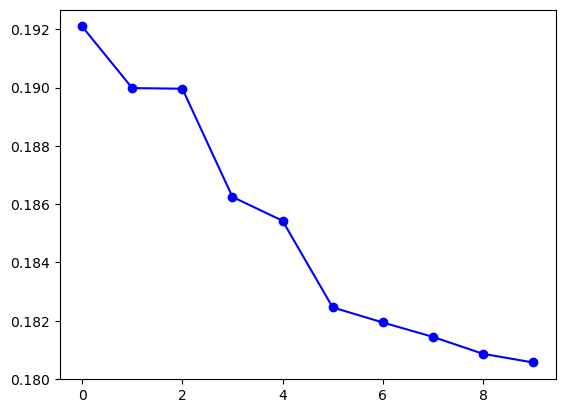

In [14]:
plt.plot(df_skmp_sorted2.head(10).index, df_skmp_sorted2['Predicted'].head(10), marker='o', linestyle='-', color='b', label='Sales')

plt.show()

In [15]:
df_skmp_s22 = df_skmp_sorted2.head(5)

In [14]:
df_pdb_s22

,index,Target Sequence 1,Target Sequence 2,Label,predicted_value
0,2428,RHPHPHLSFMAIPPKK,LFDTGSSADDSTKDTGTNFFI,1,1.352591
1,388,RHPHPHLSFMAIPPKK,LFDTGSSVEDTTKDTGTNFFI,1,1.352591
2,1654,RHPHPHLSFMAIPPKK,LFDTGSSGDEMTRDTGTNFFI,1,1.352591
3,1174,RHPHPHLSFMAIPPKK,LFDTGSSAEDYTRDTGTNFFI,1,1.352591
4,1048,RHPHPHLSFMAIPPKK,LFDTGSSAEESTKDTGTNFFI,1,1.352591
...,...,...,...,...,...
91,148,RHPHPHLSFMAIPPKK,LFDTGSSGEDTTKDTGTNFFI,1,1.352591
92,34,RHPHPHLSFMAIPPKK,LFDTGSSADESTRDTGTNFFI,1,1.352591
93,694,RHPHPHLSFMAIPPKK,LFDTGSSAEETTRDTGTNFFI,1,1.352591
94,988,RHPHPHLSFMAIPPKK,LFDTGSSGEETTKDTGTNFFI,1,1.352591


In [113]:
df_pdb_s22.to_csv('sorted_pdb_mut2_inter.csv', index=False)

In [111]:
matched = []
for i in df_skmp_s22['Mutant']:
    if i in df_pdb_s22['Target Sequence 2']:
        matched.append(i)
print(matched)

[]


In [114]:
df_pdb_skmp = pd.read_csv('predicted_pdb_skmp_mut2.csv')

In [115]:
df_pdb_skmp_sorted = df_pdb_skmp.sort_values(by='Predicted', ascending=False)

In [119]:
df_pdb_skmp_sorted.reset_index(drop=True, inplace=True)

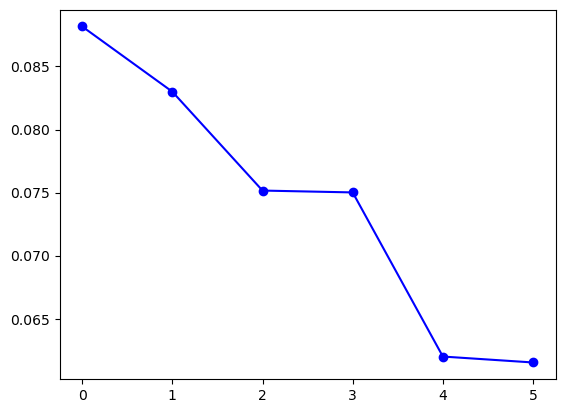

In [124]:
plt.plot(df_pdb_skmp_sorted.head(6).index, df_pdb_skmp_sorted['Predicted'].head(6), marker='o', linestyle='-', color='b', label='Sales')

plt.show()

In [125]:
df_pdb_skmp_s2 = df_pdb_skmp_sorted.head(5)

In [126]:
df_pdb_skmp_s2

,level_0,index,Target Sequence 1,Target Sequence 2,Label,predicted_value,Predicted
0,9,1888,RHPHPHLSFMAIPPKK,LFDTGSSVDDYTKDTGTNFFI,1,1.352591,0.088172
1,38,508,RHPHPHLSFMAIPPKK,LFDTGSSVDEYTKDTGTNFFI,1,1.352591,0.083001
2,55,568,RHPHPHLSFMAIPPKK,LFDTGSSVEDYTKDTGTNFFI,1,1.352591,0.075162
3,74,1108,RHPHPHLSFMAIPPKK,LFDTGSSVEEYTKDTGTNFFI,1,1.352591,0.075015
4,12,2608,RHPHPHLSFMAIPPKK,LFDTGSSADDYTKDTGTNFFI,1,1.352591,0.062002


In [16]:
df_skmp_s22

,index,Mutant,Rec,Label,Predicted
0,3038,LFDTGSSVYYWTWDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.192100
1,2978,LFDTGSSNYYWTWDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.189985
2,2918,LFDTGSSYYYWTWDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.189965
3,3098,LFDTGSSCYYWTWDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.186251
4,3278,LFDTGSSKYYWTWDTGTNFFI,RHPHPHLSFMAIPPKK,1,0.185432


In [2]:
df = pd.read_csv('pdb_sorted.csv')

In [2]:
df2 = pd.read_csv('sorted_pdb_mut2_inter.csv')

In [6]:
df2

,level_0,index,Target Sequence 1,Target Sequence 2,Label,predicted_value
0,0,2428,RHPHPHLSFMAIPPKK,LFDTGSSADDSTKDTGTNFFI,1,1.352591
1,1,388,RHPHPHLSFMAIPPKK,LFDTGSSVEDTTKDTGTNFFI,1,1.352591
2,2,1654,RHPHPHLSFMAIPPKK,LFDTGSSGDEMTRDTGTNFFI,1,1.352591
3,3,1174,RHPHPHLSFMAIPPKK,LFDTGSSAEDYTRDTGTNFFI,1,1.352591
4,4,1048,RHPHPHLSFMAIPPKK,LFDTGSSAEESTKDTGTNFFI,1,1.352591
...,...,...,...,...,...,...
91,91,148,RHPHPHLSFMAIPPKK,LFDTGSSGEDTTKDTGTNFFI,1,1.352591
92,92,34,RHPHPHLSFMAIPPKK,LFDTGSSADESTRDTGTNFFI,1,1.352591
93,93,694,RHPHPHLSFMAIPPKK,LFDTGSSAEETTRDTGTNFFI,1,1.352591
94,94,988,RHPHPHLSFMAIPPKK,LFDTGSSGEETTKDTGTNFFI,1,1.352591


In [5]:

def csv_to_fasta(csv_file, column_name, fasta_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Check if the column name exists in the dataframe
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the CSV file")
    
    # Open the output FASTA file
    with open(fasta_file, 'w') as fasta:
        # Iterate over the peptides and write them to the FASTA file with appropriate headers
        for i, peptide in enumerate(df[column_name], start=1):
            fasta.write(f'>pep{i}\n')
            fasta.write(f'{peptide}\n')


In [7]:

csv_file = 'sorted_pdb_mut2_inter.csv'  # Replace with your input CSV file path
column_name = 'Target Sequence 2'  # Replace with the name of the column containing peptides
fasta_file = 'peptides.fasta'  # Replace with your desired output FASTA file path

csv_to_fasta(csv_file, column_name, fasta_file)